In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fb_data = pd.read_csv('facebook_ads_data (2.0).csv')

In [3]:
fb_data.head()

,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
0,2022-11-05,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
1,2022-11-01,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
2,2022-10-31,Expansion,227.45,6054,58,191.87,3.92,37.57,0.009580,0.843570
3,2022-10-30,Expansion,335.91,27562,69,472.61,4.87,12.19,0.002503,1.406954
4,2022-10-29,Expansion,714.03,33358,115,680.34,6.21,21.41,0.003447,0.952817


In [4]:
fb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ad_date            1494 non-null   object 
 1   campaign_name      1494 non-null   object 
 2   total_spend        1494 non-null   float64
 3   total_impressions  1494 non-null   int64  
 4   total_clicks       1494 non-null   int64  
 5   total_value        1494 non-null   float64
 6   cpc                1443 non-null   float64
 7   cpm                1462 non-null   float64
 8   ctr                1462 non-null   float64
 9   romi               1462 non-null   float64
dtypes: float64(6), int64(2), object(2)
memory usage: 116.8+ KB


In [5]:
fb_data.describe()

,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
count,1494.000000,1494.000000,1494.000000,1494.000000,1443.000000,1462.000000,1462.000000,1462.000000
mean,131.035964,34190.182062,318.840696,165.457450,0.814712,5.085677,0.011947,1.326322
std,214.968986,44433.507387,485.663099,274.764573,1.705224,8.107076,0.013192,0.343012
min,0.000000,0.000000,0.000000,0.000000,0.010000,0.050000,0.000000,0.751445
25%,18.047500,8377.000000,62.250000,24.350000,0.170000,1.500000,0.004462,1.067832
50%,48.515000,15983.000000,148.000000,65.460000,0.350000,2.775000,0.007845,1.299482
75%,161.790000,45849.750000,371.750000,196.595000,0.765000,5.275000,0.015005,1.527423
max,2035.490000,456481.000000,6199.000000,2562.600000,24.790000,114.150000,0.159223,2.486911


In [6]:
fb_data['ad_date'] = pd.to_datetime(fb_data['ad_date'])

In [7]:
fb_spend_daily = fb_data.loc[(fb_data['ad_date'] >= '2021-01-01') & (fb_data['ad_date'] <= '2021-12-31')]

In [8]:
fb_spend_daily = fb_spend_daily.groupby(by='ad_date').agg({
    'total_spend': 'sum',
    'total_value': 'sum'
}).reset_index()

In [9]:
fb_spend_daily

,ad_date,total_spend,total_value
0,2021-01-01,0.39,0.59
1,2021-01-02,7.74,6.90
2,2021-01-04,70.06,68.47
3,2021-01-05,81.15,61.68
4,2021-01-06,142.77,145.97
...,...,...,...
324,2021-12-27,478.31,686.47
325,2021-12-28,359.83,450.47
326,2021-12-29,163.25,171.76
327,2021-12-30,285.67,330.26


<Axes: xlabel='ad_date', ylabel='total_spend'>

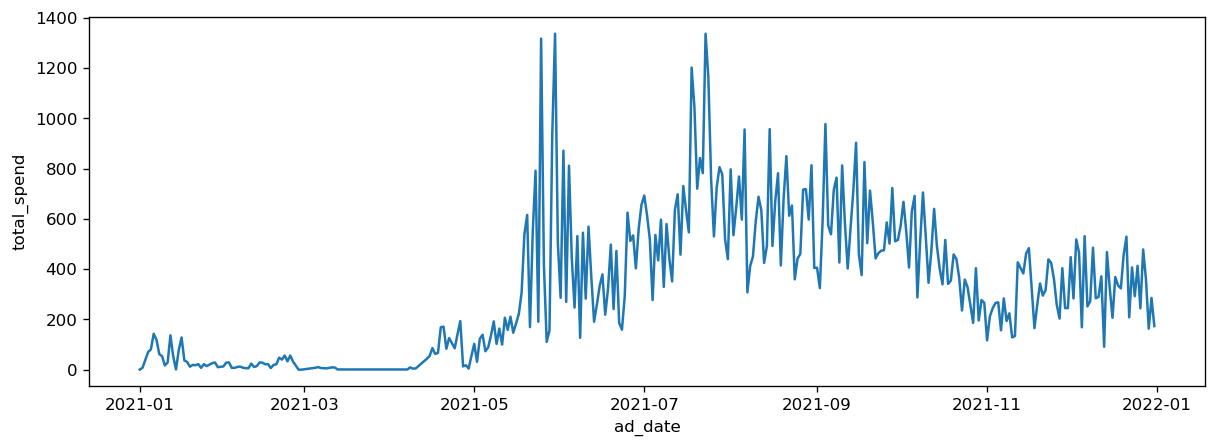

In [10]:
plt.figure(figsize=(12,4), dpi=120)
sns.lineplot(data= fb_spend_daily, x= 'ad_date', y= 'total_spend')

In [11]:
fb_spend_daily['ROMI'] = (fb_spend_daily['total_value'] - fb_spend_daily['total_spend']) / fb_spend_daily['total_spend']
fb_spend_daily['ROMI'] = fb_spend_daily['ROMI'].replace([np.inf, -np.inf], np.nan).fillna(0)

In [12]:
fb_spend_daily['spend_rolling'] = fb_spend_daily['total_spend'].rolling(window=10).mean()
fb_spend_daily['ROMI_rolling'] = fb_spend_daily['ROMI'].rolling(window=10).mean()

<Axes: xlabel='ad_date', ylabel='ROMI'>

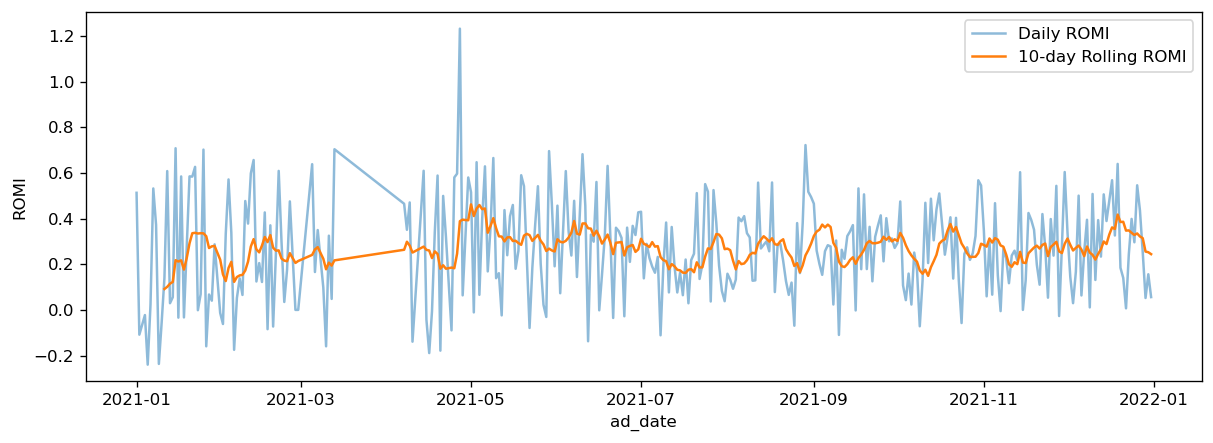

In [13]:
plt.figure(figsize=(12, 4), dpi=120)
sns.lineplot(data=fb_spend_daily, x='ad_date', y='ROMI', label='Daily ROMI', alpha=0.5)
sns.lineplot(data=fb_spend_daily, x='ad_date', y='ROMI_rolling', label='10-day Rolling ROMI')

In [14]:
campaign_stats = fb_data.groupby('campaign_name').agg({'total_spend': 'sum','total_value': 'sum'}).reset_index()

In [15]:
campaign_stats['ROMI'] = (campaign_stats['total_value'] - campaign_stats['total_spend']) / campaign_stats['total_spend']
campaign_stats['ROMI'] = campaign_stats['ROMI'].replace([np.inf, -np.inf], np.nan).fillna(0)

<Axes: xlabel='total_spend', ylabel='campaign_name'>

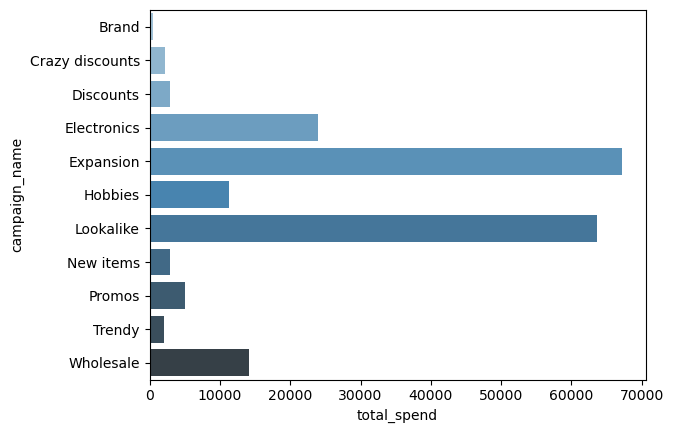

In [16]:
sns.barplot(data=campaign_stats, y='campaign_name', x='total_spend', hue='campaign_name', palette='Blues_d', legend=False)

<Axes: xlabel='ROMI', ylabel='campaign_name'>

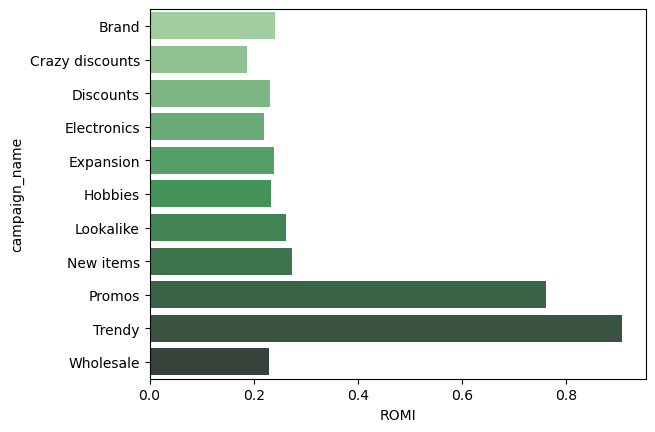

In [17]:
sns.barplot(data=campaign_stats, y='campaign_name', x='ROMI', hue='campaign_name', palette='Greens_d', legend=False)

In [18]:
fb_data['ROMI'] = (fb_data['total_value'] - fb_data['total_spend']) / fb_data['total_spend']
fb_data['ROMI'] = fb_data['ROMI'].replace([np.inf, -np.inf], np.nan).fillna(0)

In [19]:
fb_data_filtered = fb_data.dropna(subset=['ROMI', 'campaign_name'])

<Axes: xlabel='ROMI', ylabel='campaign_name'>

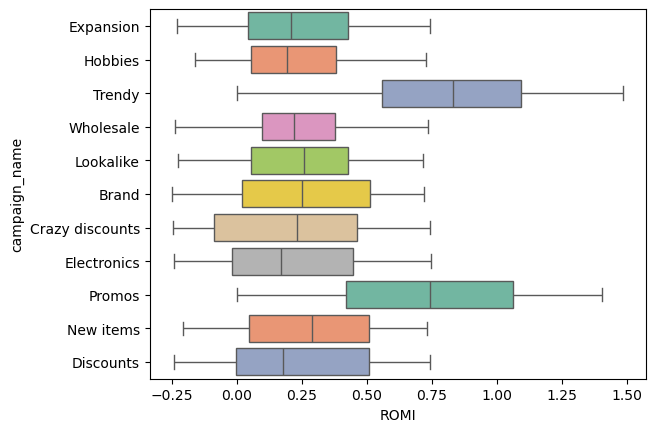

In [20]:
sns.boxplot(data=fb_data_filtered, y='campaign_name', x='ROMI', hue='campaign_name', palette='Set2', legend=False)

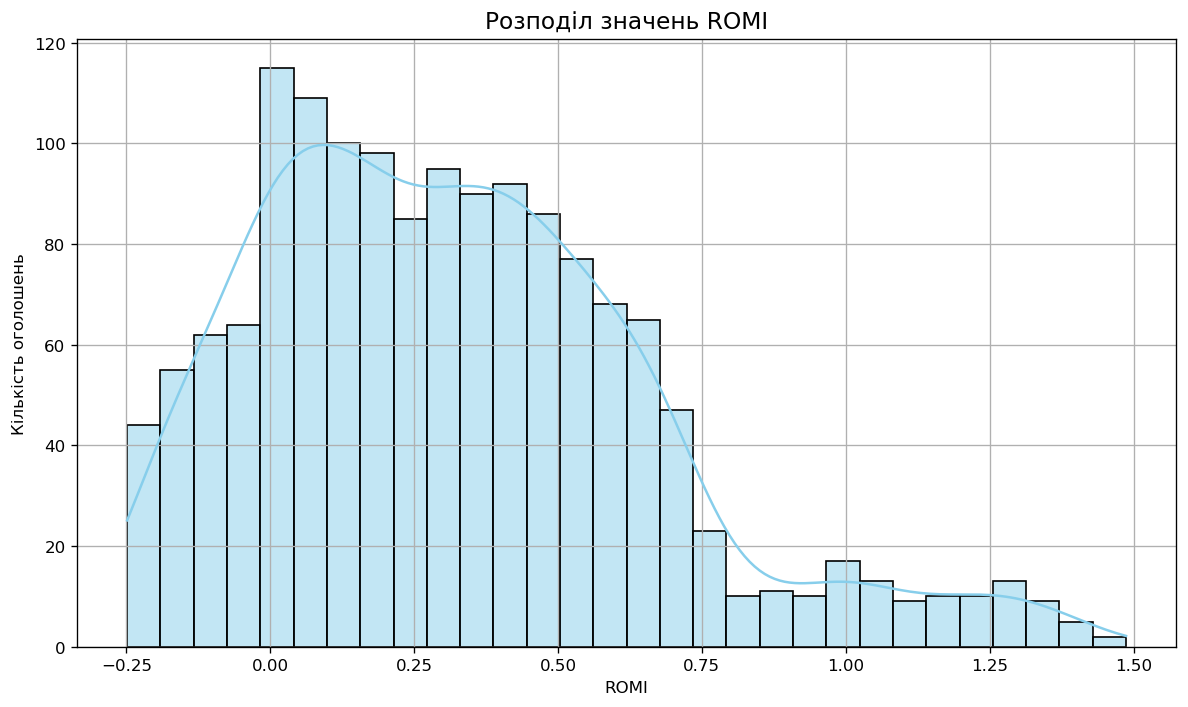

In [21]:
plt.figure(figsize=(10, 6), dpi=120)
sns.histplot(fb_data['ROMI'], bins=30, kde=True, color='skyblue')

plt.title('Розподіл значень ROMI', fontsize=14)
plt.xlabel('ROMI')
plt.ylabel('Кількість оголошень')
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
correlation_matrix = fb_data.corr(numeric_only=True)

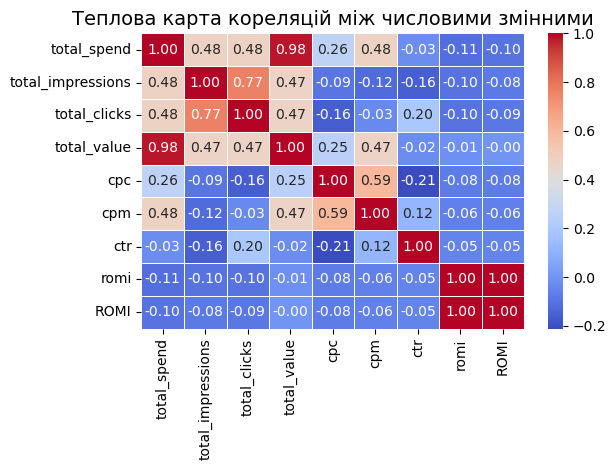

In [23]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Теплова карта кореляцій між числовими змінними', fontsize=14)
plt.tight_layout()
plt.show()

In [24]:
corr_pairs = correlation_matrix.unstack().reset_index()
corr_pairs.columns = ['Variable1', 'Variable2', 'Correlation']

In [25]:
filtered_pairs = corr_pairs[corr_pairs['Variable1'] != corr_pairs['Variable2']]
filtered_pairs = filtered_pairs.drop_duplicates(subset=['Correlation'])

In [26]:
highest_corr = filtered_pairs.loc[filtered_pairs['Correlation'].idxmax()]

In [30]:
lowest_corr = filtered_pairs.loc[filtered_pairs['Correlation'].idxmin()]

print("🔼 Найвища кореляція:", highest_corr)
print("🔽 Найнижча кореляція:", lowest_corr)

🔼 Найвища кореляція: Variable1      romi
Variable2      ROMI
Correlation     1.0
Name: 71, dtype: object
🔽 Найнижча кореляція: Variable1           cpc
Variable2           ctr
Correlation   -0.210719
Name: 42, dtype: object


In [29]:
total_value_corr = correlation_matrix['total_value'].drop('total_value').sort_values(ascending=False)

print("📊 Кореляція total_value з іншими змінними:")
print(total_value_corr)

📊 Кореляція total_value з іншими змінними:
total_spend          0.978890
total_clicks         0.472124
total_impressions    0.472037
cpm                  0.471338
cpc                  0.250851
ROMI                -0.001254
romi                -0.013733
ctr                 -0.022267
Name: total_value, dtype: float64


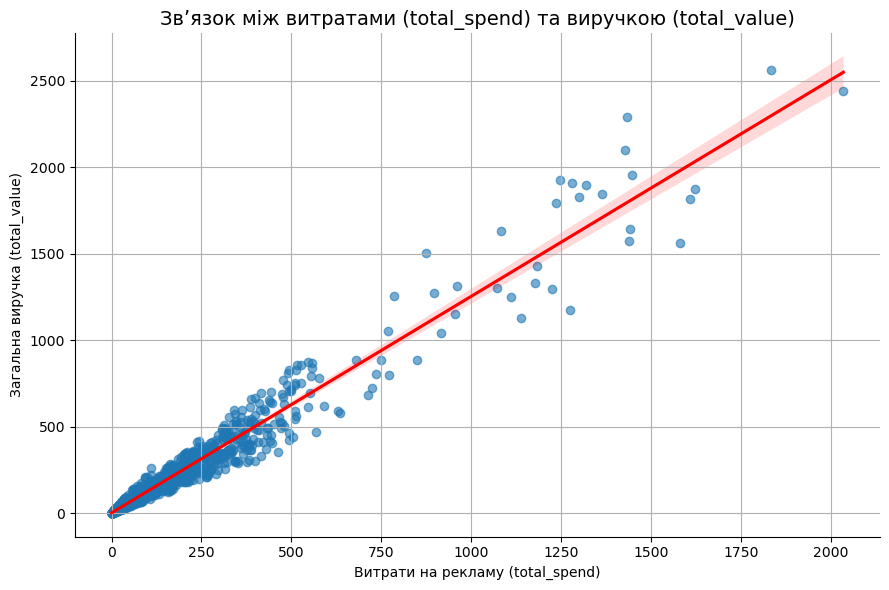

In [31]:
sns.lmplot(data=fb_data, x='total_spend', y='total_value', height=6, aspect=1.5, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('Звʼязок між витратами (total_spend) та виручкою (total_value)', fontsize=14)
plt.xlabel('Витрати на рекламу (total_spend)')
plt.ylabel('Загальна виручка (total_value)')
plt.grid(True)
plt.tight_layout()
plt.show()